In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_one_hot = pd.get_dummies(insurance, drop_first=True)
insurance_one_hot.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [5]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# build NN
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    # tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])


insurance_model.fit(x_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 8851.3281 - mae: 8851.3281
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 7862.8047 - mae: 7862.8047
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 7560.5312 - mae: 7560.5312
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 7695.7734 - mae: 7695.7734
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 7696.7236 - mae: 7696.7236
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 7612.2012 - mae: 7612.2012
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 7591.0381 - mae: 7591.0381
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7828.7231 - mae: 7828.7231
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7616.4004 - mae: 7616.4004
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7695.8423 - mae: 7695.8423

In [8]:
# check the results of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5900.8687 - mae: 5900.8687


[5900.86865234375, 5900.86865234375]

In [11]:
# build NN
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])


insurance_model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13281.5146 - mae: 13281.5146
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13101.7646 - mae: 13101.7646
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12729.9766 - mae: 12729.9766
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12009.9004 - mae: 12009.9004
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10829.8770 - mae: 10829.8770
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9370.1367 - mae: 9370.1367
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8086.1318 - mae: 8086.1318
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7521.1763 - mae: 7521.1763
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7432.2046 - mae: 7432.2046
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7414.2773 - mae:

In [12]:
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5973.2920 - mae: 5973.2920


[5973.2919921875, 5973.2919921875]

In [13]:
# build NN
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['mae'])


history = insurance_model_3.fit(x_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 11569.5156 - mae: 11569.5156
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7464.6699 - mae: 7464.6699
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7262.0884 - mae: 7262.0884
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7065.9712 - mae: 7065.9712
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6878.8101 - mae: 6878.8101
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6679.7310 - mae: 6679.7310
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6587.6626 - mae: 6587.6626
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 6481.0942 - mae: 6481.0942
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6422.6880 - mae: 6422.6880
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6340.9663 - mae: 6340.96

In [14]:
insurance_model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3319.8098 - mae: 3319.8098


[3319.809814453125, 3319.809814453125]

<Axes: >

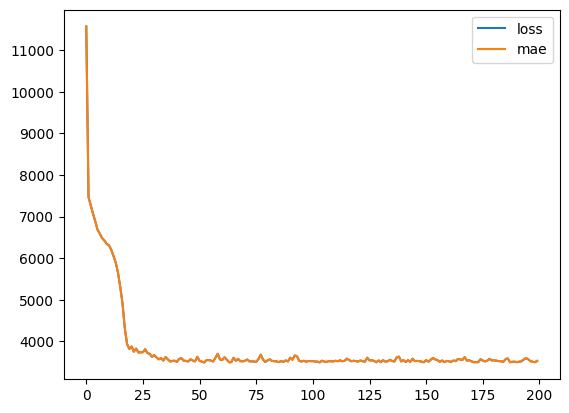

In [16]:
pd.DataFrame(history.history).plot()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children' ]),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
                             )

X = insurance.drop('charges', axis=1)
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(x_train)

x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [21]:
# build NN
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['mae'])


history = insurance_model_4.fit(x_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 8ms/step - loss: 13307.0234 - mae: 13307.0234
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 12615.6758 - mae: 12615.6758
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 9903.4707 - mae: 9903.4707
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 7894.9478 - mae: 7894.9478
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 7571.5591 - mae: 7571.5591
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 7235.5244 - mae: 7235.5244
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 6794.1338 - mae: 6794.1338
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 6215.2173 - mae: 6215.2168
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 5435.5513 - mae: 5435.5513
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 4546.0161 - mae: 4546.

In [22]:
insurance_model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1766.4175 - mae: 1766.4175


[1766.41748046875, 1766.41748046875]